In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import adjusted_mutual_info_score

In [2]:
tags = [i for i in pd.read_csv('./dataset/header.csv')]
print(tags)

['ID', 'Flow.ID', 'Source.IP', 'Source.Port', 'Destination.IP', 'Destination.Port', 'Protocol', 'Timestamp', 'Flow.Duration', 'Total.Fwd.Packets', 'Total.Backward.Packets', 'Total.Length.of.Fwd.Packets', 'Total.Length.of.Bwd.Packets', 'Fwd.Packet.Length.Max', 'Fwd.Packet.Length.Min', 'Fwd.Packet.Length.Mean', 'Fwd.Packet.Length.Std', 'Bwd.Packet.Length.Max', 'Bwd.Packet.Length.Min', 'Bwd.Packet.Length.Mean', 'Bwd.Packet.Length.Std', 'Flow.Bytes.s', 'Flow.Packets.s', 'Flow.IAT.Mean', 'Flow.IAT.Std', 'Flow.IAT.Max', 'Flow.IAT.Min', 'Fwd.IAT.Total', 'Fwd.IAT.Mean', 'Fwd.IAT.Std', 'Fwd.IAT.Max', 'Fwd.IAT.Min', 'Bwd.IAT.Total', 'Bwd.IAT.Mean', 'Bwd.IAT.Std', 'Bwd.IAT.Max', 'Bwd.IAT.Min', 'Fwd.PSH.Flags', 'Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'Fwd.Header.Length', 'Bwd.Header.Length', 'Fwd.Packets.s', 'Bwd.Packets.s', 'Min.Packet.Length', 'Max.Packet.Length', 'Packet.Length.Mean', 'Packet.Length.Std', 'Packet.Length.Variance', 'FIN.Flag.Count', 'SYN.Flag.Count', 'RST.Flag.Count',

In [3]:
df = pd.read_csv('./dataset/raw_data.csv')
display(df)

,ID,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,...,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label
0,1651,172.217.29.66-10.200.7.196-443-39485-6,10.200.7.196,39485,172.217.29.66,443,6,26/04/201711:11:25,2021337,9,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,6460,179.1.4.244-10.200.7.196-443-43024-6,10.200.7.196,43024,179.1.4.244,443,6,26/04/201711:11:53,65552,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,6578,179.1.4.244-10.200.7.196-443-43031-6,10.200.7.196,43031,179.1.4.244,443,6,26/04/201711:11:54,107032,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,7219,179.1.4.244-10.200.7.196-443-43064-6,10.200.7.196,43064,179.1.4.244,443,6,26/04/201711:11:58,75351,14,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,7683,179.1.4.244-10.200.7.196-443-43076-6,10.200.7.196,43076,179.1.4.244,443,6,26/04/201711:12:00,65862,15,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,3572701,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:43:49,119040676,2146,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4313,3572728,172.16.255.183-10.200.7.7-53-59979-17,10.200.7.7,59979,172.16.255.183,53,17,15/05/201705:45:49,31408313,647,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4314,3573244,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:36:16,76350907,4,...,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883,BENIGN
4315,3573361,172.16.255.200-10.200.7.9-53-48859-17,10.200.7.9,48859,172.16.255.200,53,17,15/05/201705:40:33,13621158,4,...,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083,BENIGN


In [4]:
ans = pd.read_csv('./dataset/cluster.csv')['Cluster']

print(ans)

0       0
1       0
2       0
3       0
4       0
       ..
4312    3
4313    3
4314    3
4315    3
4316    3
Name: Cluster, Length: 4317, dtype: int64


In [41]:
## Create the basic dataset
color = ['magenta', 'cyan', 'green', 'blue']
c = [color[i] for i in ans]

newdf = df.drop(['ID', 'Flow.ID', 'Source.IP', 'Destination.IP', 'Timestamp', 'Label'], axis=1)

display(newdf)

,Source.Port,Destination.Port,Protocol,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,Total.Length.of.Fwd.Packets,Total.Length.of.Bwd.Packets,Fwd.Packet.Length.Max,Fwd.Packet.Length.Min,...,act_data_pkt_fwd,min_seg_size_forward,Active.Mean,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min
0,39485,443,6,2021337,9,5,795,625,487,0,...,4,32,0.0,0.0,0,0,0.0,0.0,0,0
1,43024,443,6,65552,14,8,373,5252,223,0,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
2,43031,443,6,107032,14,12,373,10784,223,0,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
3,43064,443,6,75351,14,11,373,10784,223,0,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
4,43076,443,6,65862,15,13,373,11396,223,0,...,2,32,0.0,0.0,0,0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4312,59979,53,17,119040676,2146,2138,80152,234873,66,27,...,2145,20,0.0,0.0,0,0,0.0,0.0,0,0
4313,59979,53,17,31408313,647,642,24421,65673,69,27,...,646,20,0.0,0.0,0,0,0.0,0.0,0,0
4314,48859,53,17,76350907,4,0,180,0,45,45,...,3,20,1.0,0.0,1,1,76350883.0,0.0,76350883,76350883
4315,48859,53,17,13621158,4,0,180,0,45,45,...,3,20,1.0,0.0,1,1,13621083.0,0.0,13621083,13621083


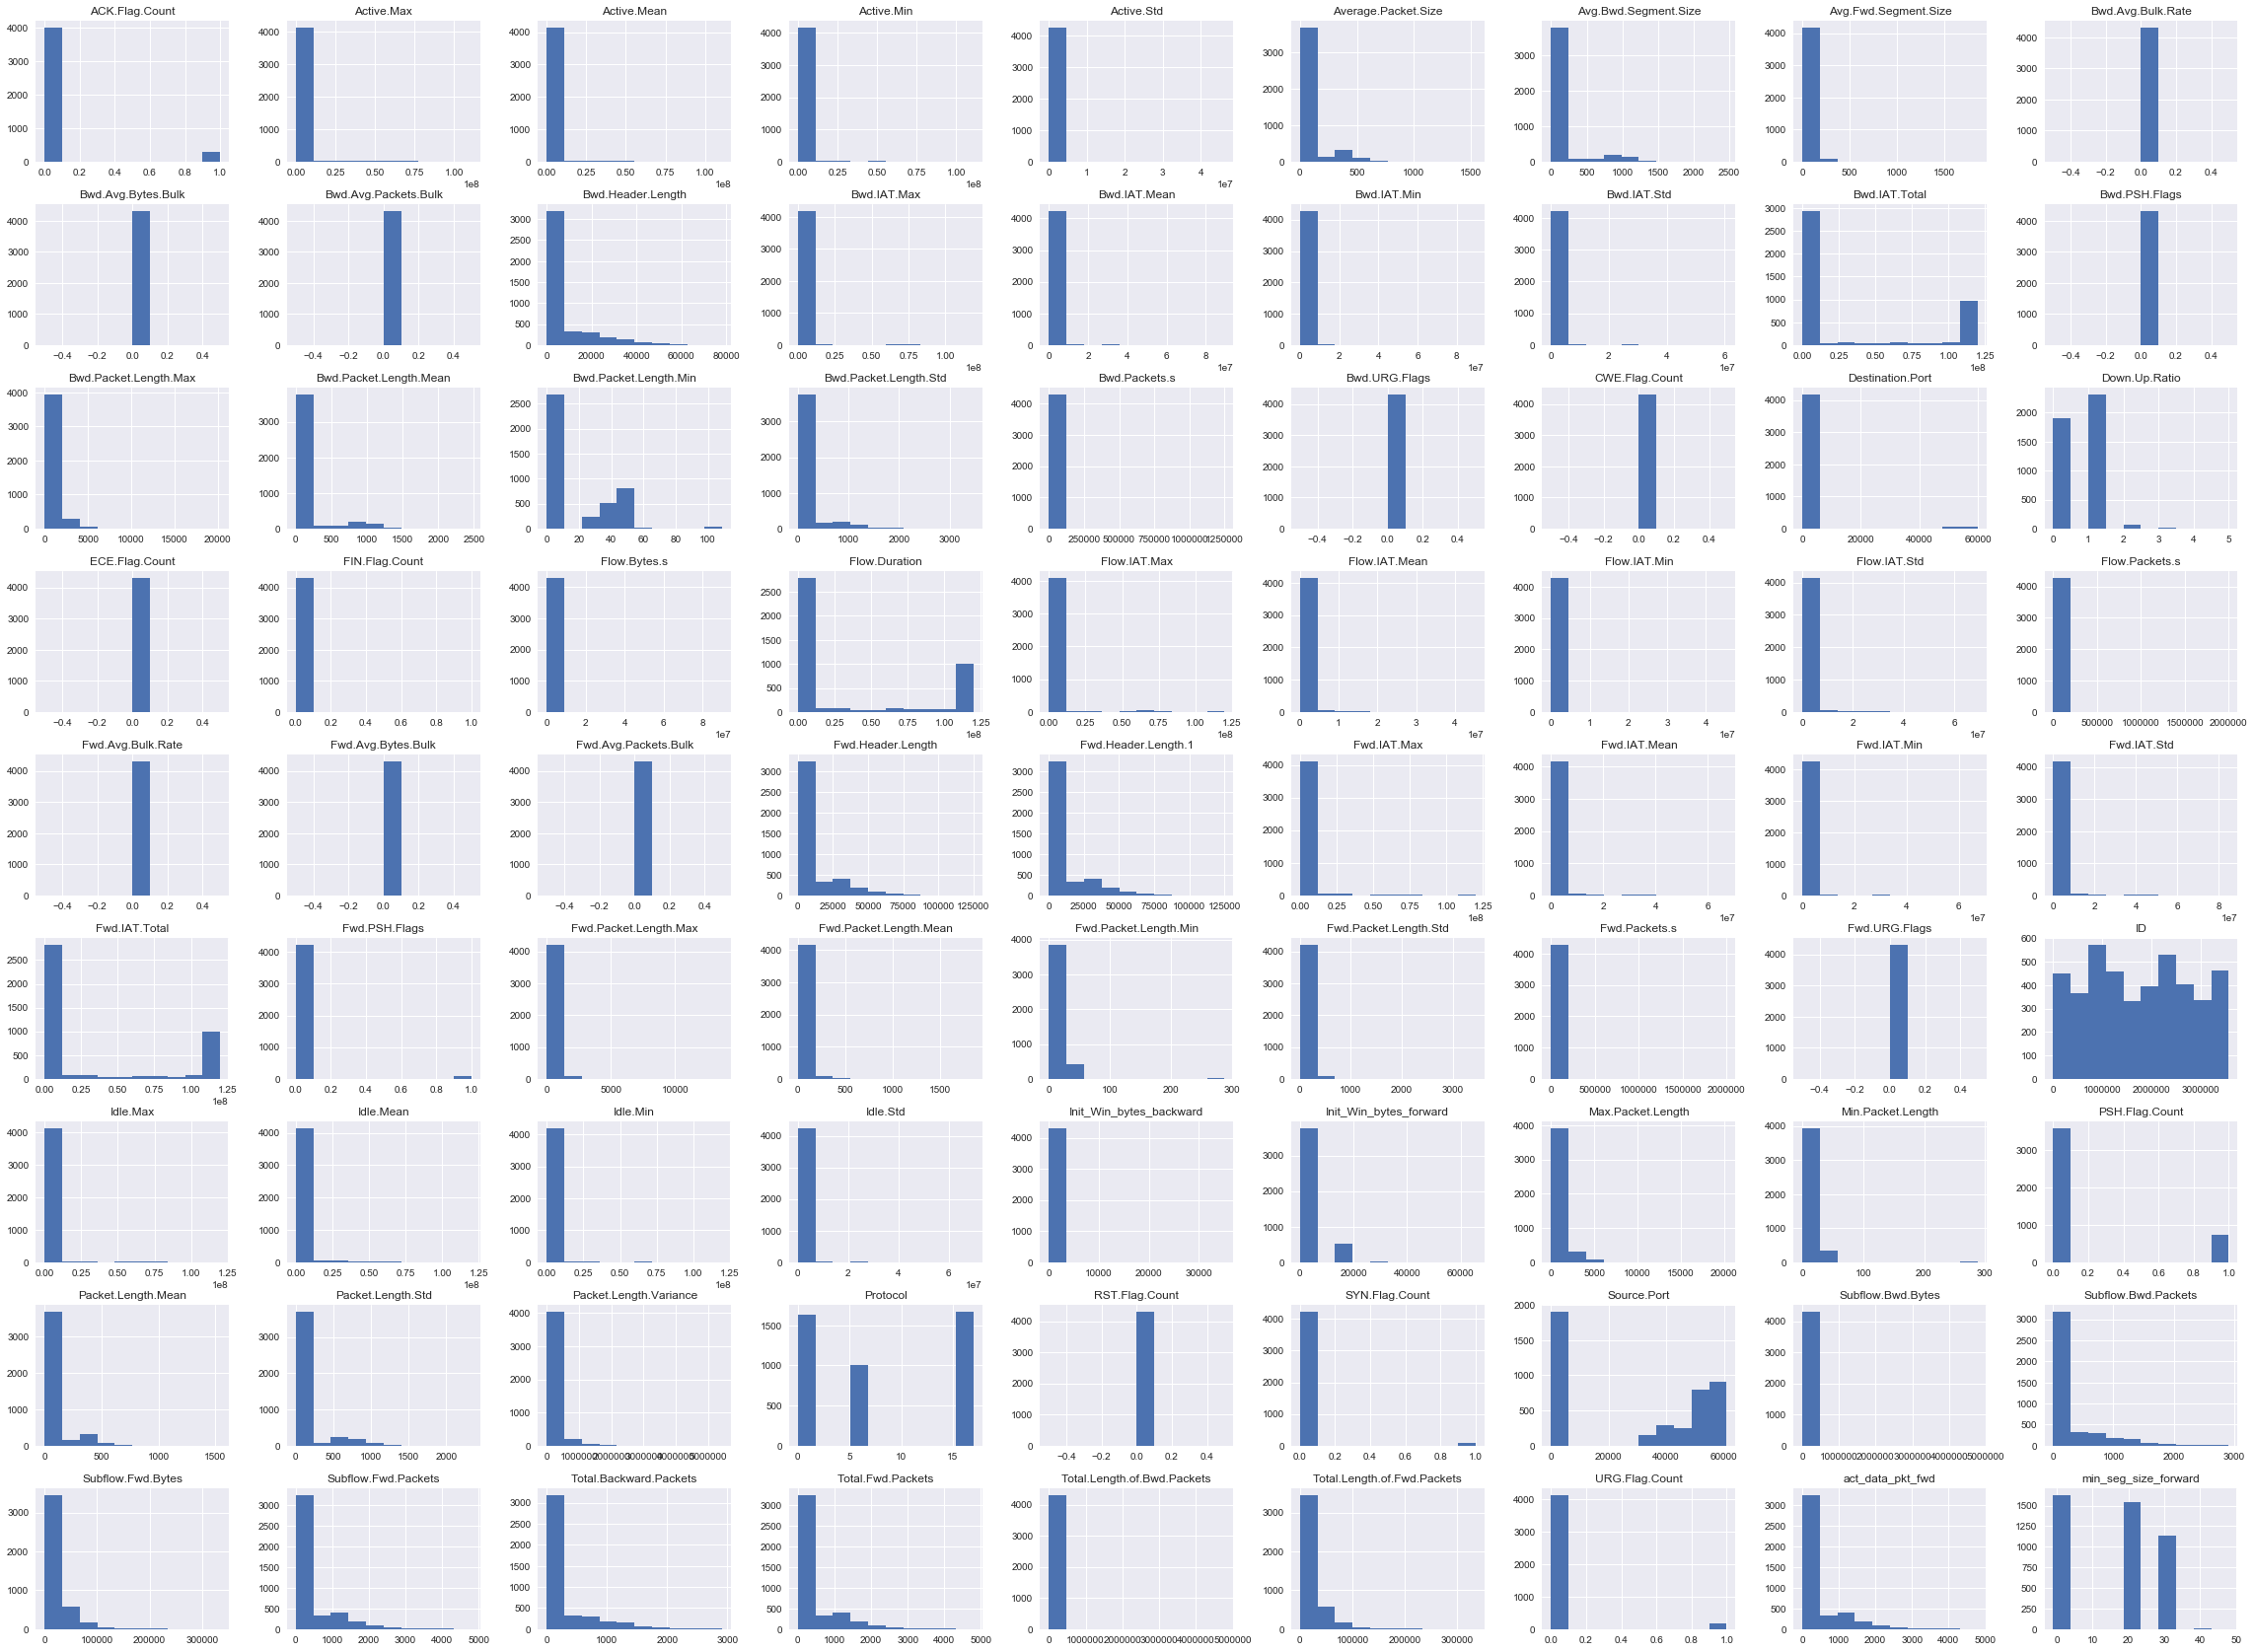

In [212]:
## Visualize the data
import seaborn as sns
df[tags].hist(figsize=(40,30))
print()

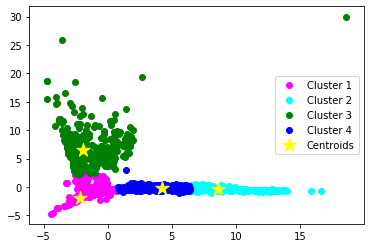

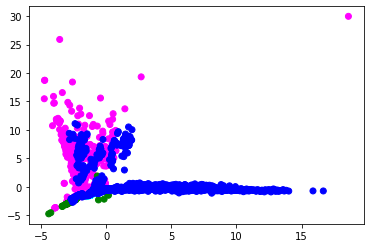

accuracy:  0.4800816137783279


In [56]:
## Test with over 70 features
from sklearn.cluster import KMeans

test_df = StandardScaler().fit_transform(newdf)

X_pca = PCA(n_components=2)
X = X_pca.fit_transform(test_df)

km = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
clusters = km.fit(X)
y = km.fit_predict(X)

## plot k-means
plt.scatter(X[y==0, 0], X[y==0, 1], c='magenta', label = 'Cluster 1')
plt.scatter(X[y==1, 0], X[y==1, 1], c='cyan', label = 'Cluster 2')
plt.scatter(X[y==2, 0], X[y==2, 1], c='green', label = 'Cluster 3')
plt.scatter(X[y==3, 0], X[y==3, 1], c='blue', label = 'Cluster 4')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, marker='*', c='yellow', label='Centroids')

plt.legend()
plt.show()

## plot the cluster given by TA
plt.scatter(X[:,0], X[:,1], c=c)
plt.show()

print("accuracy: ", adjusted_mutual_info_score(ans, y))

In [57]:
## Test over 70 features without PCA
km = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 ).fit(test_df)
y = km.fit_predict(test_df)

print("accuracy: ", adjusted_mutual_info_score(ans, y))

accuracy:  0.49985778796342384


In [42]:
from sklearn.cluster import KMeans

def k_mean(kmean_X, best_acc):
    km = KMeans(n_clusters=4,random_state=0 )
    clusters = km.fit(kmean_X)
    kmean_y = km.fit_predict(kmean_X)
    acc = adjusted_mutual_info_score(ans, kmean_y)
    
    if acc > best_acc:
        plt.scatter(kmean_X[kmean_y==0, 0], kmean_X[kmean_y==0, 1], c=color[0], label = 'Cluster 1')
        plt.scatter(kmean_X[kmean_y==1, 0], kmean_X[kmean_y==1, 1], c=color[1], label = 'Cluster 2')
        plt.scatter(kmean_X[kmean_y==2, 0], kmean_X[kmean_y==2, 1], c=color[2], label = 'Cluster 3')
        plt.scatter(kmean_X[kmean_y==3, 0], kmean_X[kmean_y==3, 1], c=color[3], label = 'Cluster 4')
        plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=200, marker='*', c='yellow', label='Centroids')
        plt.show()

        plt.scatter(kmean_X[:,0], kmean_X[:,1], c=c)
        plt.show()
    return acc

In [43]:
from sklearn.cluster import DBSCAN

def dbscan(X, best_acc):
    y = DBSCAN(min_samples = 800).fit_predict(X)
    acc = adjusted_mutual_info_score(ans, y)
    
    if acc > best_acc:
        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.show()

        plt.scatter(X[:,0], X[:,1], c=c)
        plt.show()
    return acc

In [44]:
from sklearn.cluster import AgglomerativeClustering

def AC(X, best_acc):
    y = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward').fit_predict(X)
    acc = adjusted_mutual_info_score(ans, y)
    
    if acc > best_acc:
        plt.scatter(X[:, 0], X[:, 1], c=y)
        plt.show()

        plt.scatter(X[:, 0], X[:, 1], c=c)
        plt.show()
    return acc

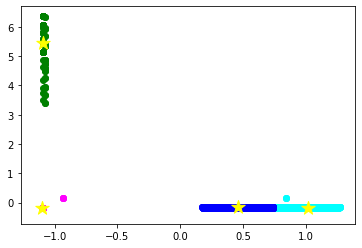

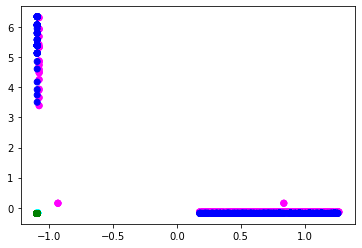

K-means
 ------------------------------
Current best accuracy score: 	 0.6389766787766124
Current best feature: 	 ['Source.Port', 'Destination.Port']


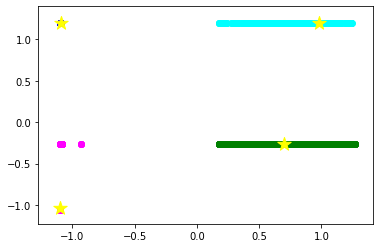

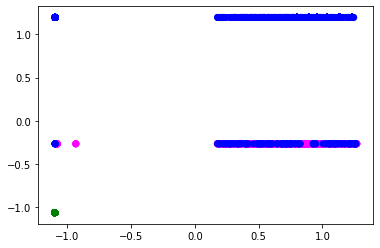

K-means
 ------------------------------
Current best accuracy score: 	 0.8176580776308203
Current best feature: 	 ['Source.Port', 'Protocol']


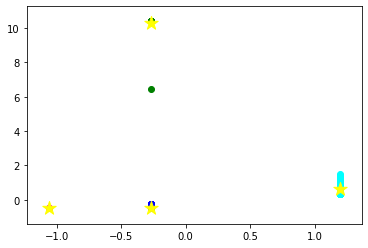

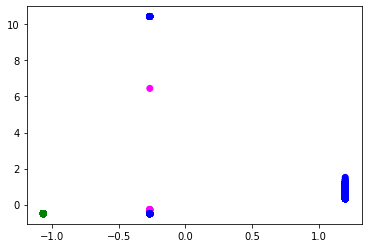

K-means
 ------------------------------
Current best accuracy score: 	 0.8515303133692764
Current best feature: 	 ['Protocol', 'Fwd.Packet.Length.Min']


C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


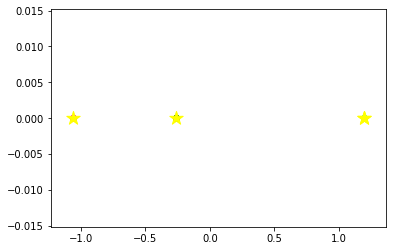

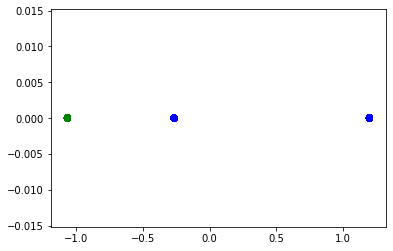

K-means
 ------------------------------
Current best accuracy score: 	 0.8529027133259797
Current best feature: 	 ['Protocol', 'Bwd.PSH.Flags']


C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarnin

C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarnin

C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarnin

C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarnin

C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: Convergen

C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: Convergen

C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarnin

C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarnin

C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  """
C:\Users\pole\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1008: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_
C:\Users\pole\anaconda3\lib\site-packages\ipykernel_launcher.py:5: ConvergenceWarnin

--------------- Result:  ---------------
K-means|  accuracy:  0.8529027133259797 feature:  ['Protocol', 'Bwd.PSH.Flags']


In [45]:
### kmean
kmean_best_acc = 0
kmean_best_ftr = []

for idx, col1 in enumerate(newdf.columns):
    for col2 in newdf.columns[idx+1:len(newdf)]:
        tmp_df = newdf[[col1, col2]].values
        tmp_df = StandardScaler().fit_transform(tmp_df)
        
        ## k-means
        kmean_acc = k_mean(tmp_df, kmean_best_acc)
        if kmean_acc > kmean_best_acc:
            kmean_best_acc = kmean_acc
            kmean_best_ftr = [col1, col2]
            print("K-means\n", "-"*30)
            print("Current best accuracy score: \t", kmean_best_acc)
            print("Current best feature: \t", kmean_best_ftr)
        
print("-"*15, "Result: ", "-"*15)
print("K-means| " , "accuracy: ", kmean_best_acc, "feature: ", kmean_best_ftr)

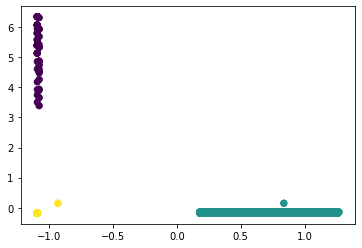

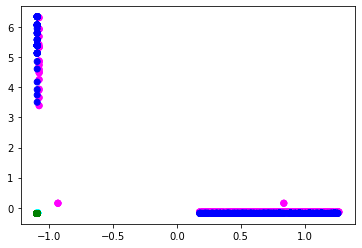

DBSCAN
 ------------------------------
Current best accuracy score: 	 0.6827849889638248
Current best feature: 	 ['Source.Port', 'Destination.Port']


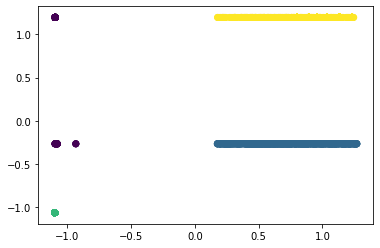

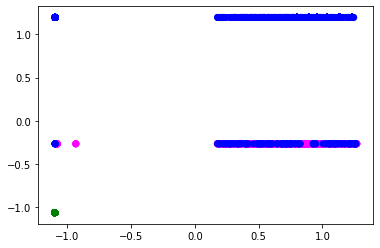

DBSCAN
 ------------------------------
Current best accuracy score: 	 0.8335251479467551
Current best feature: 	 ['Source.Port', 'Protocol']


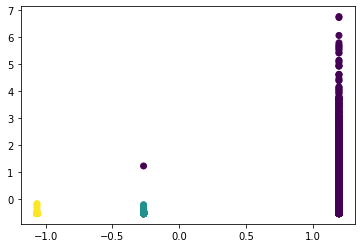

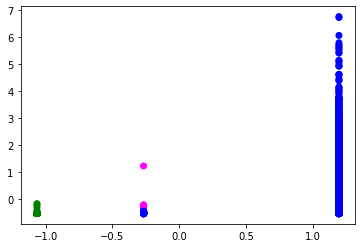

DBSCAN
 ------------------------------
Current best accuracy score: 	 0.8512376666284477
Current best feature: 	 ['Protocol', 'Total.Fwd.Packets']


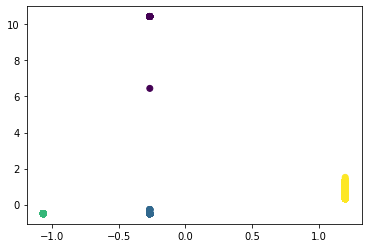

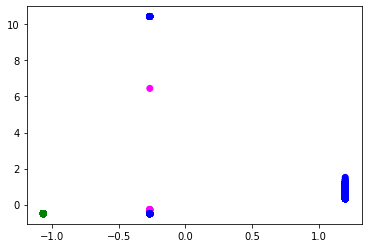

DBSCAN
 ------------------------------
Current best accuracy score: 	 0.8515303133692765
Current best feature: 	 ['Protocol', 'Fwd.Packet.Length.Min']


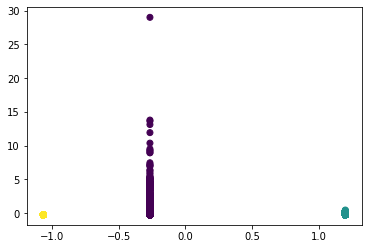

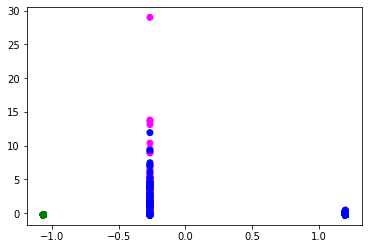

DBSCAN
 ------------------------------
Current best accuracy score: 	 0.8529027133259798
Current best feature: 	 ['Protocol', 'Fwd.Packet.Length.Std']
--------------- Result:  ---------------
DBSCAN|  accuracy:  0.8529027133259798 feature:  ['Protocol', 'Fwd.Packet.Length.Std']


In [58]:
### dbscan
dbscan_best_acc = 0
dbscan_best_ftr = []

for idx, col1 in enumerate(newdf.columns):
    for col2 in newdf.columns[idx+1:len(newdf)]:
        tmp_df = newdf[[col1, col2]].values
        tmp_df = StandardScaler().fit_transform(tmp_df)
            
        ## dbscan
        dbscan_acc = dbscan(tmp_df, dbscan_best_acc)
        if dbscan_acc > dbscan_best_acc:
            dbscan_best_acc = dbscan_acc
            dbscan_best_ftr = [col1, col2]
            print("DBSCAN\n", "-"*30)
            print("Current best accuracy score: \t", dbscan_best_acc)
            print("Current best feature: \t", dbscan_best_ftr)
        
print("-"*15, "Result: ", "-"*15)
print("DBSCAN| " , "accuracy: ", dbscan_best_acc, "feature: ", dbscan_best_ftr)

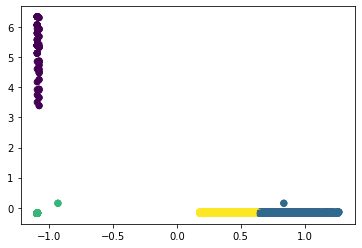

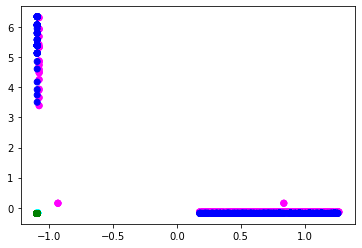

AgglomerativeClustering
 ------------------------------
Current best accuracy score: 	 0.640385343554805
Current best feature: 	 ['Source.Port', 'Destination.Port']


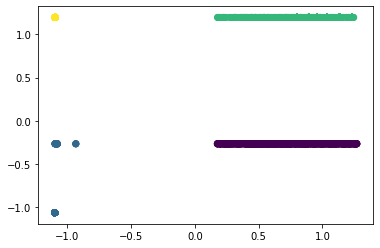

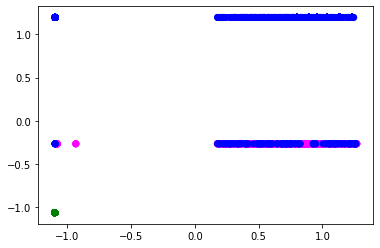

AgglomerativeClustering
 ------------------------------
Current best accuracy score: 	 0.8176580776308203
Current best feature: 	 ['Source.Port', 'Protocol']


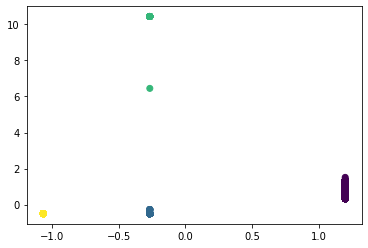

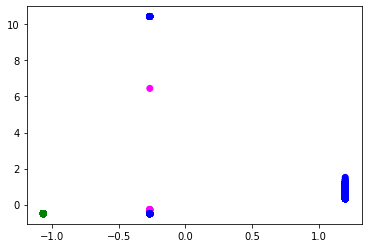

AgglomerativeClustering
 ------------------------------
Current best accuracy score: 	 0.8515303133692764
Current best feature: 	 ['Protocol', 'Fwd.Packet.Length.Min']


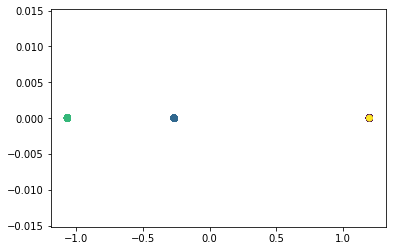

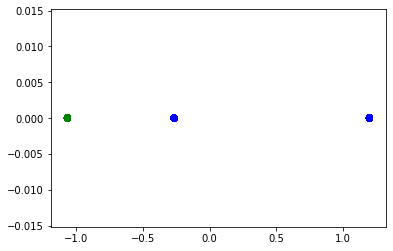

AgglomerativeClustering
 ------------------------------
Current best accuracy score: 	 0.8521414231808161
Current best feature: 	 ['Protocol', 'Bwd.PSH.Flags']
--------------- Result:  ---------------
AgglomerativeClustering|  accuracy:  0.8521414231808161 feature:  ['Protocol', 'Bwd.PSH.Flags']


In [59]:
### agglomerative clustering
ac_df = newdf

ac_best_acc = 0
ac_best_ftr = []

for idx, col1 in enumerate(newdf.columns):
    for col2 in newdf.columns[idx+1:len(newdf)]:
        tmp_df = newdf[[col1, col2]].values
        tmp_df = StandardScaler().fit_transform(tmp_df)
            
        ## ac
        ac_acc = AC(tmp_df, ac_best_acc)
        if ac_acc > ac_best_acc:
            ac_best_acc = ac_acc
            ac_best_ftr = [col1, col2]
            print("AgglomerativeClustering\n", "-"*30)
            print("Current best accuracy score: \t", ac_best_acc)
            print("Current best feature: \t", ac_best_ftr)
        
print("-"*15, "Result: ", "-"*15)
print("AgglomerativeClustering| " , "accuracy: ", ac_best_acc, "feature: ", ac_best_ftr)

In [69]:
## Tune the parameter
X = newdf[dbscan_best_ftr].values
X = StandardScaler().fit_transform(X)

smp = [200, 400, 800, 1000, 1200]
eps = [0.5, 0.1, 0.05, 0.0001]

best_acc = 0
best_smp = 0
best_eps = 0

for s in smp:
    for e in eps:
        y = DBSCAN(eps = e, min_samples=s).fit_predict(X)
        cur_acc = adjusted_mutual_info_score(ans, y)
        print("Accuracy: ", cur_acc)
        if best_acc < cur_acc:
            best_acc = cur_acc
            best_smp = s
            best_eps = e
        
print("The best accuracy is ", best_acc, " with variable: eps = ", best_eps, ", min_samples = ", best_smp)

Accuracy:  0.8199585614126255
Accuracy:  0.7549693308842047
Accuracy:  0.7513917686714685
Accuracy:  0.6817077863026837
Accuracy:  0.8188311680609889
Accuracy:  0.8200372214794722
Accuracy:  0.819073942212727
Accuracy:  0.7256604571010873
Accuracy:  0.8529027133259798
Accuracy:  0.8200372214794722
Accuracy:  0.819073942212727
Accuracy:  0.7256604571010873
Accuracy:  0.8529027133259798
Accuracy:  0.8200372214794722
Accuracy:  0.819073942212727
Accuracy:  0.7256604571010873
Accuracy:  0.8529027133259798
Accuracy:  0.81971531223458
Accuracy:  0.817484639108705
Accuracy:  0.7256604571010873
The best accuracy is  0.8529027133259798  with variable: eps =  0.5 , min_samples =  800
